Notebook to plot abundances over different time steps.

In [1]:
#function to read the abundances matrix.change "whole" to "sampled for using sampled data
function read_abundance_matrix(dir::String,t::Int64,data_to_use::String,HGT::Int64)
    return Array{Int64,2}(readdlm(dir * "otutable_"*data_to_use*"_t" * lpad(t*HGT,10,0) * ".csv",'\t',skipstart=1)[:,2:end])
end

read_abundance_matrix (generic function with 1 method)

In [14]:
const cur_dir = pwd() 
const data_dir = cur_dir*"/../output/"
const out_plots_dir = cur_dir*"/../plots/Abundance_Analysis"
try mkdir(out_plots_dir) catch end

const HGT = parse(Float64,match(r"^.*/.+HGT\=(.+)_(Her\=.+)_(RA\=.+)_Tm.+/?.*",cur_dir).captures[1])
const tMax = parse(Float64,match(r"^.*/.+HGT\=.+_Her\=.+_RA\=.+_Tm\=([0-9](\.[0-9]+)?e[0-9]+)_.+/?.*",cur_dir).captures[1])

#useful_data = ["whole","sampled"]
data_to_use = "whole"

Times = 0:1:Int(tMax/HGT)
hosts_matrices = [read_abundance_matrix(data_dir,t,data_to_use,Int(HGT)) for t in Times];

In [15]:
tot_time = length(Times)
n_sym, n_hosts = size(hosts_matrices[1])


#sym_sums = Array{Int64,2}(n_sym,tot_time)
#sym_means = Array{Float64,2}(n_sym,tot_time)
#sym_medians = Array{Float64,2}(n_sym,tot_time)
#sym_stderrs = Array{Float64,2}(n_sym,tot_time)
sym_sums = Array{Int64,1}(tot_time)
sym_means = Array{Float64,1}(tot_time)
sym_medians = Array{Float64,1}(tot_time)
sym_stderrs = Array{Float64,1}(tot_time)

for time in Times+1
    #for sym =1:n_sym
        sym_sums[time] = sum(hosts_matrices[time][1,:])
        sym_means[time] = mean(hosts_matrices[time][1,:])
        sym_medians[time] = median(hosts_matrices[time][1,:])
        sym_stderrs[time] = stdm(hosts_matrices[time][1,:],sym_means[time])/sqrt(n_hosts)
end

In [19]:
using Gadfly
using DataFrames

df_sym = DataFrame(
    time = Times, 
    sum = sym_sums,
    means = sym_means,
    medians = sym_medians,
    stder = sym_stderrs,
    ymin = sym_means .- sym_stderrs,
    ymax = sym_means .+ sym_stderrs,
    f="Symbiont"
    ) 

p = plot(df_sym, x=:time, y=:means, ymin=:ymin, ymax=:ymax, color=:f, Geom.line, Geom.ribbon)
draw(SVG(out_plots_dir*"/Abundance_over_time.svg",50cm,50cm),p)

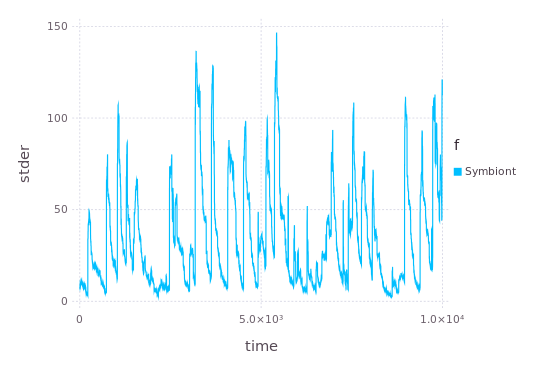

In [17]:
p = plot(df_sym, x=:time, y=:stder, color=:f, Geom.line)